<a href="https://colab.research.google.com/github/ShilpaChinnakkagari/Certificate_Generator/blob/Machine_LEARNING/Machine_Learning_Day_1_SupportVectorAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Machine (SVM)**

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. However, it is mostly used for classification problems. It is one of the most powerful and popular algorithms due to its high accuracy and ability to handle high-dimensional data.

In [28]:
#Import necessary libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [29]:
# 1. Generate perfect SVM dataset (linearly separable)
X, y = make_classification(
    n_samples=1000,
    n_features=4,
    n_informative=4,
    n_redundant=0,
    n_classes=2,
    class_sep=2.0,  # Clear separation between classes
    random_state=42
)
# 2. Convert to DataFrame for better visualization
feature_names = [f'feature_{i+1}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

In [30]:
#Visualize the dataset

dataset = df
df

,feature_1,feature_2,feature_3,feature_4,target
0,-3.439926,-2.371106,0.974213,0.897621,0
1,0.633049,2.380114,-0.416510,1.443968,1
2,-2.321133,-1.680427,1.749495,-1.281137,1
3,0.669945,2.443556,-0.491654,2.019528,1
4,-2.211829,-3.021848,1.143790,1.501954,0
...,...,...,...,...,...
995,-2.565182,-1.913232,1.495010,-0.378238,1
996,-0.600971,3.692596,-0.688559,3.504642,1
997,-0.956675,-1.200804,-2.827989,-2.952151,0
998,1.259675,2.685565,-1.112371,2.995352,1


In [31]:
#Define X and y features
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values


In [32]:
#Split the dataset for training and testing set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=0)


In [34]:
#Feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [35]:
#import Support Vector Algorithm

from sklearn.svm import SVC
sc_classifier = SVC(kernel = 'linear',random_state=0)
sc_classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [36]:
#Predict the results

y_pred = sc_classifier.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1])

In [37]:
#Measure the performance of the algorithm for the uploaded dataset

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.84
[[107  19]
 [ 21 103]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       126
           1       0.84      0.83      0.84       124

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250



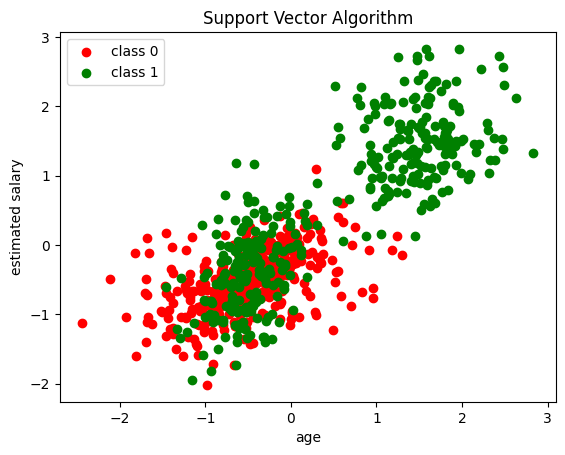

In [38]:
from matplotlib.colors import ListedColormap

#inverse scaled features back

X_set,y_set = sc.inverse_transform(X_train),y_train
plt.scatter(X_set[y_set == 0,0], X_set[y_set == 0,1],color='red',label = 'class 0')
plt.scatter(X_set[y_set == 1,0], X_set[y_set == 1,1],color='green',label = 'class 1')

#Plot the graphs
plt.title("Support Vector Algorithm")
plt.xlabel("age")
plt.ylabel("estimated salary")
plt.legend()
plt.show()